In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_csv("data/BA_reviews(new).csv")
data.head()

,Unnamed: 0,reviews,ratings,Aircraft,Type Of Traveller,Seat Type,Routes,Date of flying,Seat Comfort Ratings,Staff Ratings,Food Ratings,Ground Services Ratings,Value for Money Ratings,Recomendation,Inflight Entertainment,Wifi & Connectivity
0,0,Not Verified | My wife and I are very disappo...,1.0,NaN,Family Leisure,Economy Class,Amsterdam to Pittsburgh via London,September 2024,2.0,2.0,2.0,1.0,1,no,2.0,2.0
1,1,Not Verified | We flew BA between Heathrow an...,8.0,A321,Couple Leisure,Economy Class,Heathrow to Berlin,July 2024,3.0,4.0,3.0,4.0,3,yes,NaN,NaN
2,2,Not Verified | Absolutely disgusted with BA. ...,1.0,NaN,Couple Leisure,Economy Class,Manchester to Seattle via London,May 2024,NaN,NaN,NaN,1.0,1,no,NaN,NaN
3,3,Not Verified | Took a trip to Nashville with m...,8.0,Boeing 777-2OOLR,Couple Leisure,Business Class,London Heathrow to Nashville,August 2024,4.0,4.0,4.0,2.0,3,yes,2.0,NaN
4,4,Not Verified | A nightmare journey courtesy o...,1.0,A319 / A321NEO,Couple Leisure,Economy Class,London to Venice,September 2024,2.0,3.0,NaN,1.0,1,no,NaN,NaN


### Check for Null Values

In [11]:
data.shape

(3800, 16)

In [12]:
data.isnull().sum()

Unnamed: 0                    0
reviews                       0
ratings                       5
Aircraft                   1788
Type Of Traveller           710
Seat Type                     2
Routes                      715
Date of flying              717
Seat Comfort Ratings        124
Staff Ratings               138
Food Ratings                424
Ground Services Ratings     789
Value for Money Ratings       0
Recomendation                 0
Inflight Entertainment     1216
Wifi & Connectivity        3130
dtype: int64

In [14]:
data[["review_verify","review_content"]] = data["reviews"].str.split('|',n=1,expand=True)
data["review_verify"].str.strip()
data["review_content"].str.strip()

0       My wife and I are very disappointed with flyin...
1       We flew BA between Heathrow and Berlin one way...
2       Absolutely disgusted with BA. Our flights were...
3       Took a trip to Nashville with my wife for a le...
4       A nightmare journey courtesy of British Airway...
                              ...                        
3795                                                 None
3796                                                 None
3797                                                 None
3798                                                 None
3799                                                 None
Name: review_content, Length: 3800, dtype: object

In [15]:
data.head()

,Unnamed: 0,reviews,ratings,Aircraft,Type Of Traveller,Seat Type,Routes,Date of flying,Seat Comfort Ratings,Staff Ratings,Food Ratings,Ground Services Ratings,Value for Money Ratings,Recomendation,Inflight Entertainment,Wifi & Connectivity,review_verify,review_content
0,0,Not Verified | My wife and I are very disappo...,1.0,NaN,Family Leisure,Economy Class,Amsterdam to Pittsburgh via London,September 2024,2.0,2.0,2.0,1.0,1,no,2.0,2.0,Not Verified,My wife and I are very disappointed with fly...
1,1,Not Verified | We flew BA between Heathrow an...,8.0,A321,Couple Leisure,Economy Class,Heathrow to Berlin,July 2024,3.0,4.0,3.0,4.0,3,yes,NaN,NaN,Not Verified,We flew BA between Heathrow and Berlin one w...
2,2,Not Verified | Absolutely disgusted with BA. ...,1.0,NaN,Couple Leisure,Economy Class,Manchester to Seattle via London,May 2024,NaN,NaN,NaN,1.0,1,no,NaN,NaN,Not Verified,Absolutely disgusted with BA. Our flights we...
3,3,Not Verified | Took a trip to Nashville with m...,8.0,Boeing 777-2OOLR,Couple Leisure,Business Class,London Heathrow to Nashville,August 2024,4.0,4.0,4.0,2.0,3,yes,2.0,NaN,Not Verified,Took a trip to Nashville with my wife for a l...
4,4,Not Verified | A nightmare journey courtesy o...,1.0,A319 / A321NEO,Couple Leisure,Economy Class,London to Venice,September 2024,2.0,3.0,NaN,1.0,1,no,NaN,NaN,Not Verified,A nightmare journey courtesy of British Airw...


## Analyzing the Review Content

In [20]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk

# Download stopwords and wordnet data if you haven't already
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize the lemmatizer
lemma = WordNetLemmatizer()

# Prepare to clean and lemmatize reviews
corpus = []

# Iterate over the reviews
for rev in data["review_content"]:
    if isinstance(rev, str):  # Check if rev is a string
        # Remove non-alphabetic characters and convert to lowercase
        rev = re.sub('[^a-zA-Z]', ' ', rev)
        rev = rev.lower()
        
        # Split the review into words and apply lemmatization + stopword removal
        rev = rev.split()
        rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
        
        # Join words back into a single string
        rev = " ".join(rev)
    else:
        rev = ""  # Or use 'None' or any other placeholder you prefer

    # Add the cleaned review to the corpus list
    corpus.append(rev)

# Add the processed reviews to the dataframe
data['corpus'] = corpus


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VEDANT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\VEDANT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
data.head()

,Unnamed: 0,reviews,ratings,Aircraft,Type Of Traveller,Seat Type,Routes,Date of flying,Seat Comfort Ratings,Staff Ratings,Food Ratings,Ground Services Ratings,Value for Money Ratings,Recomendation,Inflight Entertainment,Wifi & Connectivity,review_verify,review_content,corpus
0,0,Not Verified | My wife and I are very disappo...,1.0,NaN,Family Leisure,Economy Class,Amsterdam to Pittsburgh via London,September 2024,2.0,2.0,2.0,1.0,1,no,2.0,2.0,Not Verified,My wife and I are very disappointed with fly...,wife disappointed flying british airway flight...
1,1,Not Verified | We flew BA between Heathrow an...,8.0,A321,Couple Leisure,Economy Class,Heathrow to Berlin,July 2024,3.0,4.0,3.0,4.0,3,yes,NaN,NaN,Not Verified,We flew BA between Heathrow and Berlin one w...,flew ba heathrow berlin one way connection exp...
2,2,Not Verified | Absolutely disgusted with BA. ...,1.0,NaN,Couple Leisure,Economy Class,Manchester to Seattle via London,May 2024,NaN,NaN,NaN,1.0,1,no,NaN,NaN,Not Verified,Absolutely disgusted with BA. Our flights we...,absolutely disgusted ba flight cancelled may b...
3,3,Not Verified | Took a trip to Nashville with m...,8.0,Boeing 777-2OOLR,Couple Leisure,Business Class,London Heathrow to Nashville,August 2024,4.0,4.0,4.0,2.0,3,yes,2.0,NaN,Not Verified,Took a trip to Nashville with my wife for a l...,took trip nashville wife leisure break arrived...
4,4,Not Verified | A nightmare journey courtesy o...,1.0,A319 / A321NEO,Couple Leisure,Economy Class,London to Venice,September 2024,2.0,3.0,NaN,1.0,1,no,NaN,NaN,Not Verified,A nightmare journey courtesy of British Airw...,nightmare journey courtesy british airway wors...


## Analyzing Passenger Ratings

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               3800 non-null   int64  
 1   reviews                  3800 non-null   object 
 2   ratings                  3795 non-null   float64
 3   Aircraft                 2012 non-null   object 
 4   Type Of Traveller        3090 non-null   object 
 5   Seat Type                3798 non-null   object 
 6   Routes                   3085 non-null   object 
 7   Date of flying           3083 non-null   object 
 8   Seat Comfort Ratings     3676 non-null   float64
 9   Staff Ratings            3662 non-null   float64
 10  Food Ratings             3376 non-null   float64
 11  Ground Services Ratings  3011 non-null   float64
 12  Value for Money Ratings  3800 non-null   int64  
 13  Recomendation            3800 non-null   object 
 14  Inflight Entertainment  

c:\Python\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


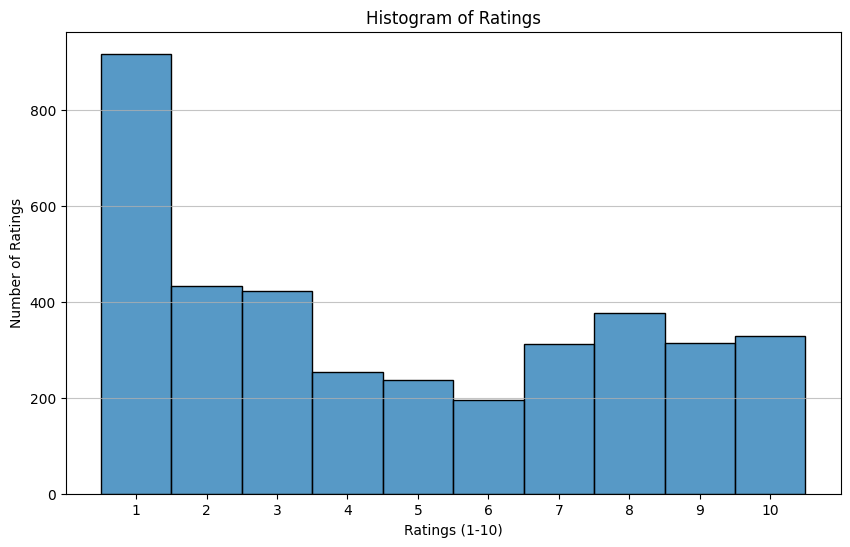

In [24]:
ratings_data = data["ratings"].dropna()
plt.figure(figsize=(10, 6))
sns.histplot(ratings_data, bins=range(1, 12), discrete=True, kde=False)
plt.xticks(range(1, 11))  # Set x-ticks to be the rating values
plt.title('Histogram of Ratings')
plt.xlabel('Ratings (1-10)')
plt.ylabel('Number of Ratings')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [56]:
data.describe()

,Unnamed: 0,ratings,Seat Comfort Ratings,Staff Ratings,Food Ratings,Ground Services Ratings,Value for Money Ratings,Inflight Entertainment,Wifi & Connectivity
count,3800.00000,3795.000000,3676.000000,3662.000000,3376.000000,3011.000000,3800.000000,2584.000000,670.000000
mean,1899.50000,4.679578,2.856910,3.237848,2.705865,2.763534,2.659737,2.650542,1.935821
std,1097.10984,3.175601,1.362744,1.490554,1.438819,1.461310,1.470159,1.403695,1.340549
min,0.00000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,949.75000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1899.50000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000
75%,2849.25000,8.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,3.000000
max,3799.00000,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


c:\Python\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


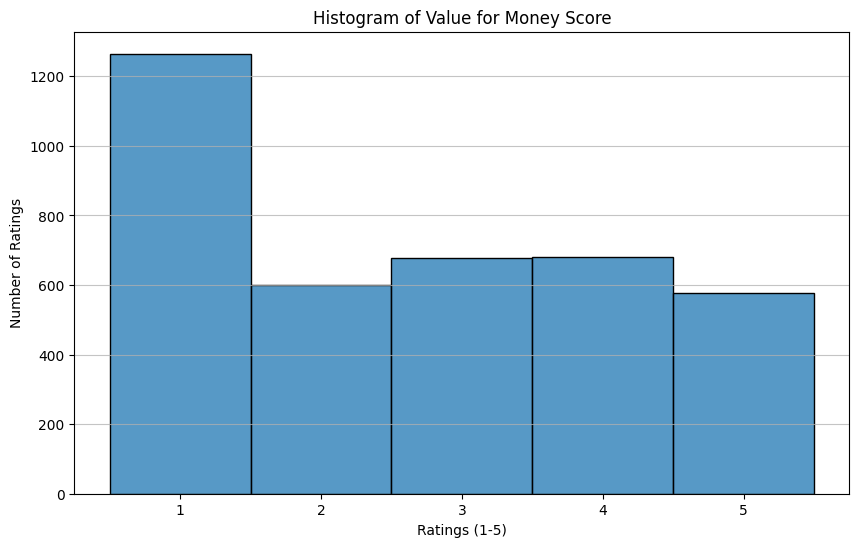

In [27]:
val_money_data = data["Value for Money Ratings"].dropna()
plt.figure(figsize=(10, 6))
sns.histplot(val_money_data, bins=range(1, 12), discrete=True, kde=False)
plt.xticks(range(1, 6))  # Set x-ticks to be the rating values
plt.title('Histogram of Value for Money Score')
plt.xlabel('Ratings (1-5)')
plt.ylabel('Number of Ratings')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [28]:
# Average Rating
ratings_data.mean()

4.679578392621871

## Finding Common Words for Ratings Category

In [29]:
import pandas as pd
from collections import Counter
import nltk
import re

In [31]:
df1 = data[(data["ratings"] >=1) & (data["ratings"] <= 4)]
# Combine all text into a single string and tokenize
all_words = ' '.join(df1['corpus']).lower()  # Join all corpus entries and convert to lowercase
all_words = re.findall(r'\b\w+\b', all_words)  # Use regex to find words

# Count occurrences
word_counts = Counter(all_words)

# Get the most common words
most_common_words = word_counts.most_common(25)  # Get the 10 most common words

# Print the results
print("Most Common Words:")
for word, count in most_common_words:
    print(f"{word}: {count}")

Most Common Words:
flight: 3448
ba: 2312
seat: 1531
service: 1239
london: 1046
hour: 1037
airline: 1010
british: 955
airway: 947
time: 878
class: 797
one: 767
get: 728
food: 720
business: 715
would: 706
customer: 688
u: 666
staff: 664
heathrow: 634
cabin: 592
passenger: 586
crew: 583
told: 572
check: 558


In [33]:
def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax

In [34]:
new_words = [word for word in data.corpus if word not in stopwords]

TypeError: argument of type 'WordListCorpusReader' is not iterable

### Word Frequency

In [42]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = " ".join(list(data.corpus)).split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review",''])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

c:\Python\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'food'),
  Text(4, 0, 'hour'),
  Text(5, 0, 'crew'),
  Text(6, 0, 'class'),
  Text(7, 0, 'cabin'),
  Text(8, 0, 'good'),
  Text(9, 0, 'business'),
  Text(10, 0, 'staff'),
  Text(11, 0, 'check'),
  Text(12, 0, 'economy'),
  Text(13, 0, 'customer'),
  Text(14, 0, 'meal'),
  Text(15, 0, 'drink'),
  Text(16, 0, 'boarding'),
  Text(17, 0, 'bag'),
  Text(18, 0, 'day'),
  Text(19, 0, 'experience')])

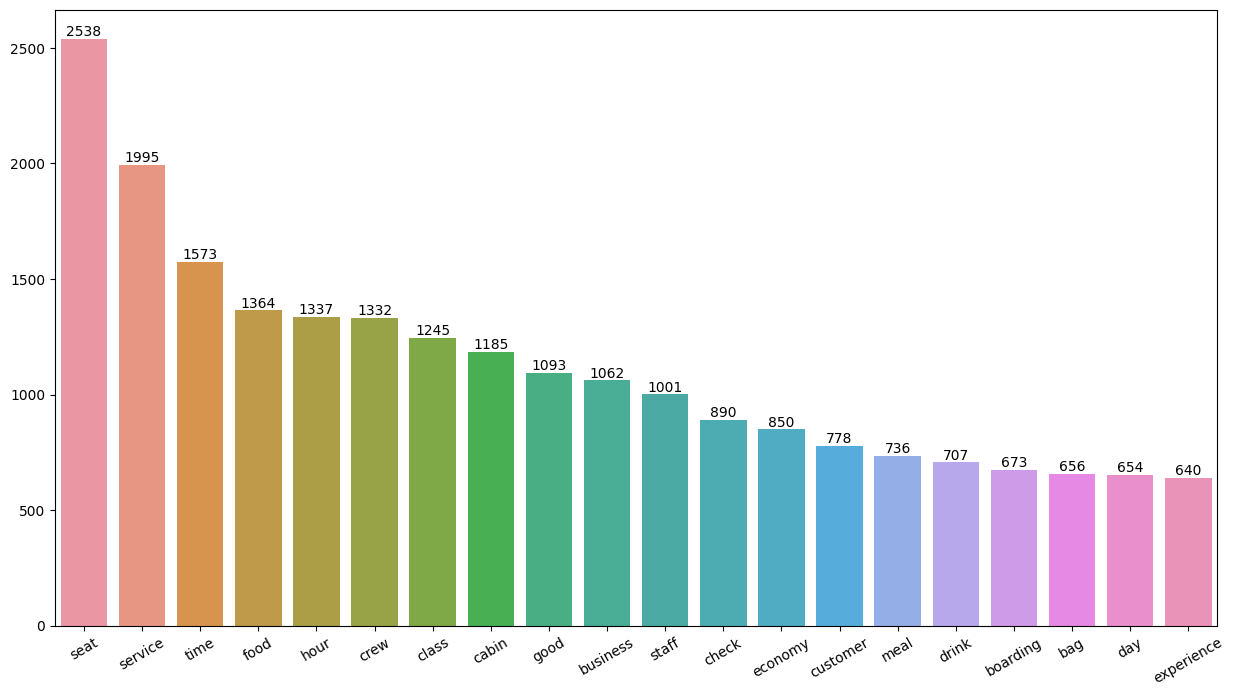

In [43]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

<AxesSubplot:>

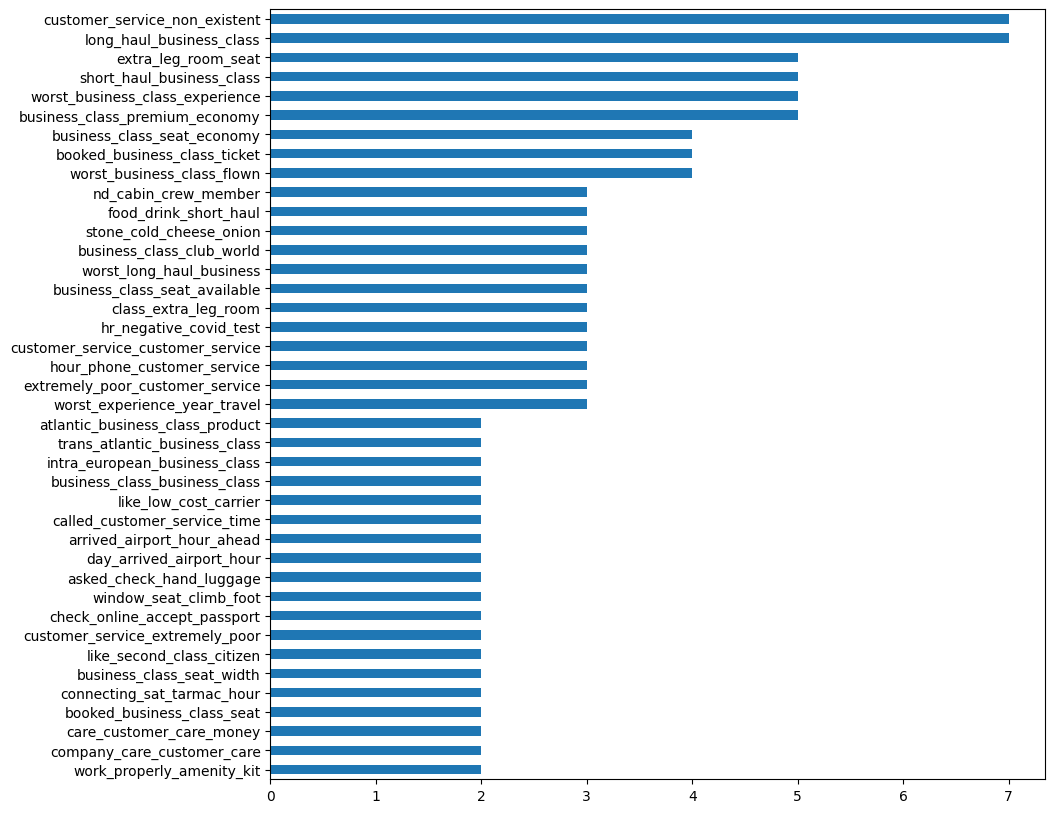

In [44]:
# Ratings 1 - 4
df1 = data[data["ratings"] <= 4]
## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df1.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)

<AxesSubplot:>

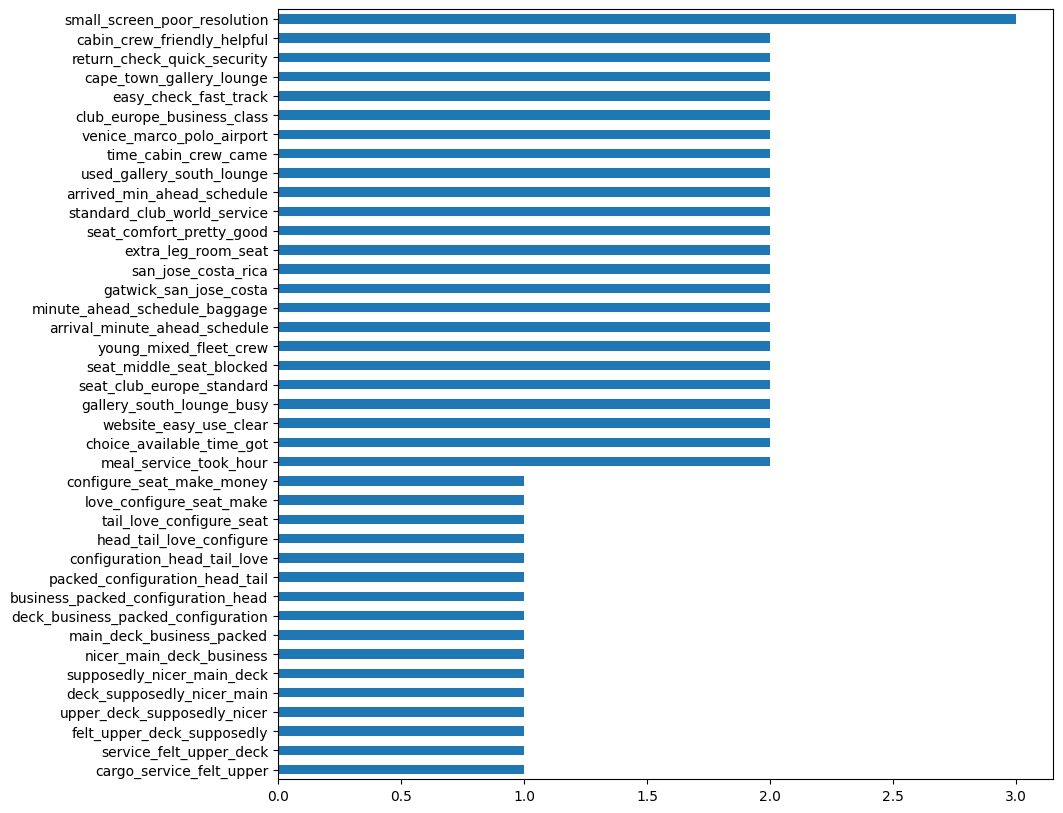

In [45]:
# Ratings 5-7
df2 = data[(data["ratings"] <= 7) & (data["ratings"] >= 5)]
## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df2.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)

<AxesSubplot:>

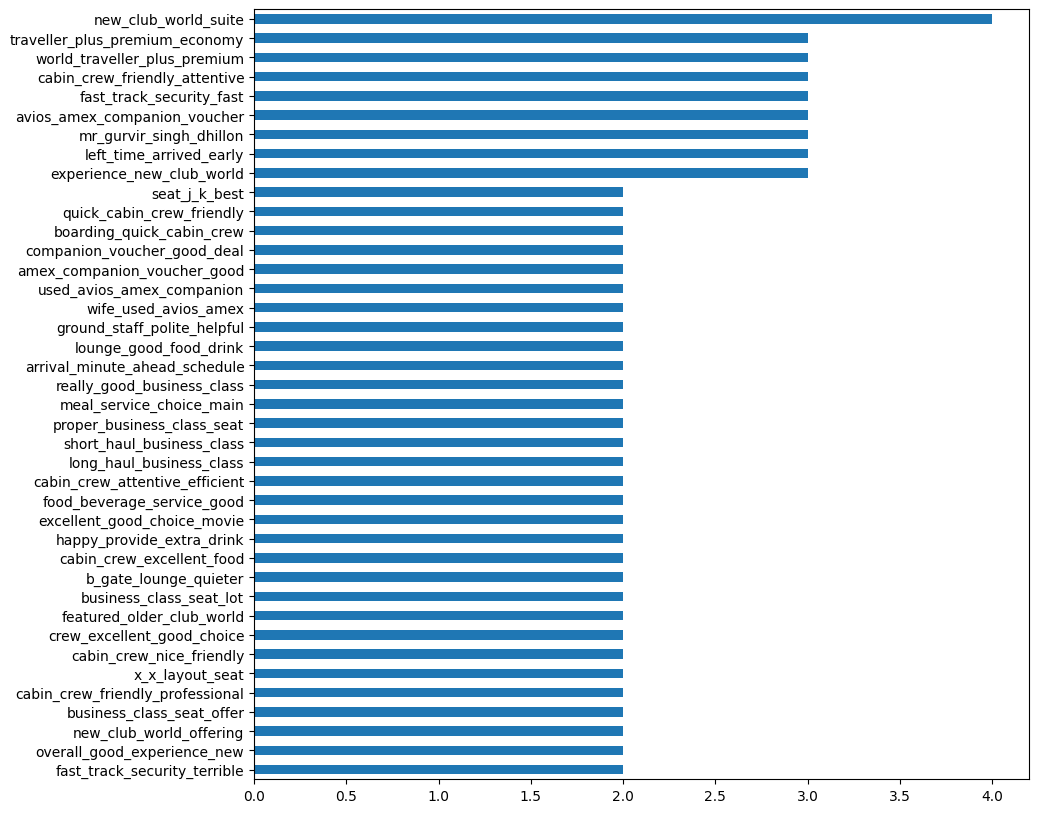

In [46]:
# Ratings 8-10
df3 = data[data["ratings"] >= 8]
## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df3.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)

## Topic Modelling